#Importação de bibliotecas 

Nesta sessão, importamos todas as bibliotecas que são utilizadas no nosso modelo preditivo

In [19]:
import numpy as np
import pandas as pd
import sklearn
#from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm
from sklearn.svm import SVC
import plotly.express as px
import seaborn as sns
import pickle
import collections, numpy


# Importando dados

Nesta sessão importamos todos os dados que são utilizados para treino e teste do nosso modelo, importamos os json que foram disponibilizados e que faziam sentido com nossa solução. Criamos algumas células de códigos para fazer a junção dos dados, está tudo detalhado nos códigos abaixo

In [20]:
#drive.mount('/content/drive')
Tresa4acountBalance = pd.read_json('dados/301 a 400/accounts/03-accounts-balances.json')
quatroa5acountBalance = pd.read_json('dados/401 a 500/accounts/03-accounts-balances (1).json')
Tresa4acounttransaction = pd.read_json('dados/301 a 400/accounts/04-accounts-transactions.json')
quatroa5acounttransaction = pd.read_json('dados/401 a 500/accounts/04-accounts-transactions (1).json')
Tresa4PersonalIdent = pd.read_json('dados/301 a 400\customers/01-personal-identification.json')
quatro4PersonalIdent = pd.read_json('dados/401 a 500\customers/01-personal-identification (1).json')
Tresa4PersonalQuality = pd.read_json('dados/301 a 400\customers/01-personal-qualification.json')
quatroa5PersonalQuality = pd.read_json('dados/401 a 500\customers/01-personal-qualification (1).json')



In [21]:
baseTemporaria = Tresa4acountBalance[['customerId','organizationId','availableAmount']]
baseTemp = quatroa5acountBalance[['customerId','organizationId','availableAmount']]



In [22]:
baseTemporaria2 = Tresa4acounttransaction[['customerId','organizationId','transactionName','type','amount','transactionDate']]
basetemp2 = quatroa5acounttransaction[['customerId','organizationId','transactionName','type','amount','transactionDate']]


In [23]:
baseTemporaria3 = Tresa4PersonalIdent[['customerId','organizationId','birthDate','socialName']]
baseTemp3 = quatro4PersonalIdent[['customerId','organizationId','birthDate','socialName']]


In [24]:
baseTemporaria4 = Tresa4PersonalQuality[['customerId','organizationId','informedIncome','informedPatrimony']]
basetemp4 = quatroa5PersonalQuality[['customerId','organizationId','informedIncome','informedPatrimony']]


Junção de todas as bases temporárias, isso foi necessário porque fizemos um tratamento em algumas base de dados que continham poucas colunas que poderiam ser utilizadas no nosso projeto

In [25]:
base = baseTemporaria.merge(baseTemporaria2)
base = base.merge(baseTemporaria3)
base = base.merge(baseTemporaria4)
baseUsers2 = baseTemp.merge(basetemp2)
baseUsers2 = baseUsers2.merge(baseTemp3)
baseUsers2 = baseUsers2.merge(basetemp4)
base = pd.concat([base,baseUsers2])

#Gráficos e Análises dos dados

Nesta sessão, criamos gráficos e analisamos as variaveis que temos, com isso conseguimos saber quais dados realmente são relevantes para a nossa solução

In [26]:
base.columns

Index(['customerId', 'organizationId', 'availableAmount', 'transactionName',
       'type', 'amount', 'transactionDate', 'birthDate', 'socialName',
       'informedIncome', 'informedPatrimony'],
      dtype='object')

Gráfico que mostra os valores de transações em relação ao Id da organização, desta forma 

In [27]:
hist = px.histogram(base,x='organizationId',y='amount')
hist.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Gráfico de valor da transação em relação ao tipo de produto comprado ou pix enviado

In [ ]:
hist = px.histogram(base,x='transactionName',y='amount')
hist.show()

Output hidden; open in https://colab.research.google.com to view.

#Tratamento de dados

Nesta sessão está todo o tratamento dos dados que obtivemos, desde exclusão de dados ausentes até o hot encoding

In [ ]:
# Ordena os index no dataset
base = base.reset_index()
base.pop('index')

0             0
1             1
2             2
3             3
4             4
          ...  
105857    53303
105858    53304
105859    53305
105860    53306
105861    53307
Name: index, Length: 105862, dtype: int64

In [ ]:
# Remove a coluna birthDate e deixa apenas transações por pix
base = base.drop(columns=['birthDate'])
base = base.loc[base['type'] == 'PIX']
base = base.reset_index()
base.pop('index')


0             0
1             1
2             3
3             5
4             6
          ...  
15943    105810
15944    105817
15945    105821
15946    105848
15947    105850
Name: index, Length: 15948, dtype: int64

In [ ]:
amounts = []

# Para cada linha, armazenar o valor de amounts, retirados do dicionário da coluna informedIncome.
for i in range(base.shape[0]):
  amounts.append(base['informedIncome'][i]['amount'])

# Cria a coluna Amounts
income_month = pd.Series(amounts)
base['incomePerMonth'] = income_month
base.pop('informedIncome') # Remove a coluna de dicionários anterior

0        {'frequency': 'MENSAL', 'amount': 2854.02, 'cu...
1        {'frequency': 'MENSAL', 'amount': 2854.02, 'cu...
2        {'frequency': 'MENSAL', 'amount': 2854.02, 'cu...
3        {'frequency': 'MENSAL', 'amount': 2854.02, 'cu...
4        {'frequency': 'MENSAL', 'amount': 2854.02, 'cu...
                               ...                        
15943    {'frequency': 'MENSAL', 'amount': 8875.72, 'cu...
15944    {'frequency': 'MENSAL', 'amount': 8875.72, 'cu...
15945    {'frequency': 'MENSAL', 'amount': 8875.72, 'cu...
15946    {'frequency': 'MENSAL', 'amount': 8875.72, 'cu...
15947    {'frequency': 'MENSAL', 'amount': 8875.72, 'cu...
Name: informedIncome, Length: 15948, dtype: object

In [ ]:
base['informedPatrimony'][0]['amount']

24890.05

In [ ]:
patrimony = []
for i in range(base.shape[0]):
  patrimony.append(base['informedPatrimony'][i]['amount'])

personal_patrimony = pd.Series(patrimony)
base['patrimony'] = personal_patrimony
base.pop('informedPatrimony')




0        {'amount': 24890.05, 'currency': 'BRL', 'year'...
1        {'amount': 24890.05, 'currency': 'BRL', 'year'...
2        {'amount': 24890.05, 'currency': 'BRL', 'year'...
3        {'amount': 24890.05, 'currency': 'BRL', 'year'...
4        {'amount': 24890.05, 'currency': 'BRL', 'year'...
                               ...                        
15943    {'amount': 13789.86, 'currency': 'BRL', 'year'...
15944    {'amount': 13789.86, 'currency': 'BRL', 'year'...
15945    {'amount': 13789.86, 'currency': 'BRL', 'year'...
15946    {'amount': 13789.86, 'currency': 'BRL', 'year'...
15947    {'amount': 13789.86, 'currency': 'BRL', 'year'...
Name: informedPatrimony, Length: 15948, dtype: object

In [ ]:
days = []
months = []

dates = pd.to_datetime(base['transactionDate'])

for date in dates:
  days.append(date.day)
  months.append(date.month)

transaction_day = pd.Series(days)
transaction_month = pd.Series(months)
base['transactionDay'] = transaction_day
base['transactionMonth'] = transaction_month
base.pop('transactionDate')


0        2021-02-21
1        2021-09-16
2        2021-03-16
3        2021-03-19
4        2021-05-14
            ...    
15943    2021-02-18
15944    2021-09-16
15945    2021-08-08
15946    2021-06-08
15947    2021-10-01
Name: transactionDate, Length: 15948, dtype: object

In [ ]:
base.pop('socialName')
base.pop('type')

0        PIX
1        PIX
2        PIX
3        PIX
4        PIX
        ... 
15943    PIX
15944    PIX
15945    PIX
15946    PIX
15947    PIX
Name: type, Length: 15948, dtype: object

In [ ]:
coluna_amount = base.loc[base['customerId'] == '196.528.279-23', ['amount']]
media = float(coluna_amount.mean())

In [ ]:
customers = base['customerId'].unique()
desvio_por_cpf = []
cpfs = []

for customer in customers:
  amount_per_cpf = base.loc[base['customerId'] == customer, ['amount']]
  desvio_por_cpf.append(round(float(amount_per_cpf.std()), 4))
  cpfs.append(customer)

In [ ]:
desv_pad = {}

for i in range(len(cpfs)):
  desv_pad[cpfs[i]] = desvio_por_cpf[i]

desv_pad

{'196.528.279-23': 2258.7809,
 '521.173.113-76': 2110.2175,
 '032.048.044-35': 2438.08,
 '421.129.444-94': 2201.3623,
 '320.616.056-32': 2129.0399,
 '800.618.513-77': 2482.0796,
 '184.875.186-86': 2655.1376,
 '193.000.865-07': 2343.5254,
 '919.274.524-32': 2222.8613,
 '515.387.999-92': 2720.1499,
 '038.260.411-96': 2971.4751,
 '542.927.687-12': 1771.1127,
 '195.483.631-10': 2768.5932,
 '633.745.970-47': 2398.0873,
 '744.155.451-38': 2359.0329,
 '353.185.500-12': 2166.2138,
 '419.765.798-74': 2393.3817,
 '655.933.938-52': 2109.5269,
 '495.014.574-82': 3166.6626,
 '758.476.684-83': 2351.9714,
 '300.312.976-80': 2570.047,
 '972.621.794-27': 2085.0772,
 '810.860.746-63': 3073.8963,
 '265.441.565-42': 2273.327,
 '579.059.326-18': 2134.2208,
 '815.152.105-49': 2481.5606,
 '710.951.127-01': 2633.0379,
 '181.500.010-56': 2190.9634,
 '136.698.155-02': 2245.6632,
 '532.600.741-21': 2330.5007,
 '118.125.654-53': 2751.4476,
 '534.681.841-11': 2588.0862,
 '396.106.044-16': 2660.559,
 '143.931.363-6

In [ ]:
import random as rd

sum = 0
times = []
times_series = []

# Para cada dia, transforma os minutos em decimal de hora
for i in range(24):
  # Para cada minuto na hora,
  for j in range(60):
    sum += 1/60
    times.append(round(i + sum, 2))
  sum = 0

# Randômicamente atribui valores de horário ao array time
for guess in range(base.shape[0]):
  rand = rd.randint(0, (len(times)-1))
  times_series.append(times[rand])

# Cria a coluna de horário
schedules = pd.Series(times_series)
base['schedules'] = schedules



In [ ]:
base['standardDeviation'] = base['customerId'].replace(desv_pad)

base['outlier'] = np.where(base['amount'] > 3*base['standardDeviation'], 1, 0)

base


,customerId,organizationId,availableAmount,transactionName,amount,incomePerMonth,patrimony,transactionDay,transactionMonth,schedules,standardDeviation,outlier
0,196.528.279-23,63d929c5-2a09-479e-806c-8cd073a029ab,79872.71,Educação,482.18,2854.02,24890.05,21,2,10.43,2258.7809,0
1,196.528.279-23,63d929c5-2a09-479e-806c-8cd073a029ab,79872.71,Alimentação,384.91,2854.02,24890.05,16,9,12.98,2258.7809,0
2,196.528.279-23,63d929c5-2a09-479e-806c-8cd073a029ab,79872.71,Decoração,806.22,2854.02,24890.05,16,3,10.77,2258.7809,0
3,196.528.279-23,63d929c5-2a09-479e-806c-8cd073a029ab,79872.71,Passeio,272.96,2854.02,24890.05,19,3,21.12,2258.7809,0
4,196.528.279-23,63d929c5-2a09-479e-806c-8cd073a029ab,79872.71,Lanche,18.01,2854.02,24890.05,14,5,4.43,2258.7809,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15943,219.778.534-52,63d929c5-2a09-479e-806c-8cd073a029ab,-4639.85,Lanche,6.02,8875.72,13789.86,18,2,2.38,2186.6161,0
15944,219.778.534-52,63d929c5-2a09-479e-806c-8cd073a029ab,-4639.85,Limpeza,195.41,8875.72,13789.86,16,9,22.52,2186.6161,0
15945,219.778.534-52,63d929c5-2a09-479e-806c-8cd073a029ab,-4639.85,Farmácia,20.63,8875.72,13789.86,8,8,13.68,2186.6161,0
15946,219.778.534-52,63d929c5-2a09-479e-806c-8cd073a029ab,-4639.85,PetShop,45.60,8875.72,13789.86,8,6,3.75,2186.6161,0


(Separação de 50% do dataset para ser manipulado com objetivo de retornar as transações como possivelmente fraudulentas)

In [ ]:

base3 = base.loc[[1],['availableAmount','amount','schedules','incomePerMonth','patrimony','standardDeviation','transactionDay','transactionMonth']]
base3 = base3.to_json
base3

<bound method NDFrame.to_json of    availableAmount  amount  schedules  incomePerMonth  patrimony  \
1         79872.71  384.91      12.98         2854.02   24890.05   

   standardDeviation  transactionDay  transactionMonth  
1          2258.7809              16                 9  >

In [ ]:
minmaxob=MinMaxScaler().fit(base[['availableAmount','amount','schedules','incomePerMonth','patrimony','standardDeviation','transactionDay','transactionMonth']])
MinMaxRes = minmaxob.transform(base[['availableAmount','amount','schedules','incomePerMonth','patrimony','standardDeviation','transactionDay','transactionMonth']] )


In [ ]:
base

,customerId,organizationId,availableAmount,transactionName,amount,incomePerMonth,patrimony,transactionDay,transactionMonth,schedules,standardDeviation,outlier
0,196.528.279-23,63d929c5-2a09-479e-806c-8cd073a029ab,79872.71,Educação,482.18,2854.02,24890.05,21,2,10.43,2258.7809,0
1,196.528.279-23,63d929c5-2a09-479e-806c-8cd073a029ab,79872.71,Alimentação,384.91,2854.02,24890.05,16,9,12.98,2258.7809,0
2,196.528.279-23,63d929c5-2a09-479e-806c-8cd073a029ab,79872.71,Decoração,806.22,2854.02,24890.05,16,3,10.77,2258.7809,0
3,196.528.279-23,63d929c5-2a09-479e-806c-8cd073a029ab,79872.71,Passeio,272.96,2854.02,24890.05,19,3,21.12,2258.7809,0
4,196.528.279-23,63d929c5-2a09-479e-806c-8cd073a029ab,79872.71,Lanche,18.01,2854.02,24890.05,14,5,4.43,2258.7809,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15943,219.778.534-52,63d929c5-2a09-479e-806c-8cd073a029ab,-4639.85,Lanche,6.02,8875.72,13789.86,18,2,2.38,2186.6161,0
15944,219.778.534-52,63d929c5-2a09-479e-806c-8cd073a029ab,-4639.85,Limpeza,195.41,8875.72,13789.86,16,9,22.52,2186.6161,0
15945,219.778.534-52,63d929c5-2a09-479e-806c-8cd073a029ab,-4639.85,Farmácia,20.63,8875.72,13789.86,8,8,13.68,2186.6161,0
15946,219.778.534-52,63d929c5-2a09-479e-806c-8cd073a029ab,-4639.85,PetShop,45.60,8875.72,13789.86,8,6,3.75,2186.6161,0


In [ ]:
pickle.dump(MinMaxScaler, open('/content/MinMax.pkl', 'wb'))

In [ ]:
base[['availableAmount','amount','schedules','incomePerMonth','patrimony','standardDeviation','transactionDay','transactionMonth']] = Normalizer().fit_transform(base[['availableAmount','amount','schedules','incomePerMonth','patrimony','standardDeviation','transactionDay','transactionMonth']])
base = base[['availableAmount','amount','schedules','incomePerMonth','patrimony','standardDeviation','transactionDay','transactionMonth']]
base.iloc[1]

availableAmount      0.953806
amount               0.004596
schedules            0.000155
incomePerMonth       0.034081
patrimony            0.297226
standardDeviation    0.026973
transactionDay       0.000191
transactionMonth     0.000107
Name: 1, dtype: float64

In [ ]:
# base[base['customerId'] == '196.528.279-23'].count()

In [ ]:
normaliza = MinMaxScaler()

In [ ]:
pickle.dump(normaliza, open('/content/normaliza.pkl', 'wb'))

#Criação de dados outliers

tinhamos um problema em relação aos dados que foram disponibilizados para utilizarmos no nosso modelo, não existiam dados de transações fraudulentas para treinar o modelo, então decidimos criar esses dados com base em análises que fizemos sobre fraudes no pix.

In [ ]:
outliers = []

for i in range(base.shape[0]):
  outliers.append(0)

col_outlier = pd.Series(outliers)
base['outlier'] = col_outlier

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
base


,availableAmount,amount,schedules,incomePerMonth,patrimony,standardDeviation,transactionDay,transactionMonth,outlier
0,0.953800,0.005758,0.000125,0.034081,0.297225,0.026973,0.000251,0.000024,0
1,0.953806,0.004596,0.000155,0.034081,0.297226,0.026973,0.000191,0.000107,0
2,0.953772,0.009627,0.000129,0.034080,0.297216,0.026972,0.000191,0.000036,0
3,0.953811,0.003260,0.000252,0.034082,0.297228,0.026974,0.000227,0.000036,0
4,0.953816,0.000215,0.000053,0.034082,0.297230,0.026974,0.000167,0.000060,0
...,...,...,...,...,...,...,...,...,...
15943,-0.270029,0.000350,0.000139,0.516547,0.802539,0.127256,0.001048,0.000116,0
15944,-0.270011,0.011372,0.001311,0.516513,0.802486,0.127248,0.000931,0.000524,0
15945,-0.270029,0.001201,0.000796,0.516547,0.802538,0.127256,0.000466,0.000466,0
15946,-0.270028,0.002654,0.000218,0.516545,0.802536,0.127256,0.000466,0.000349,0


In [ ]:
for i in range(7000):
  item = i+3
  multiplier = rd.uniform(3, 8)
  base['amount'][item] = round(base['amount'][item]*multiplier, 2)
  base['outlier'][item] = 1
  base['availableAmount'][item] = round(base['availableAmount'][item] - (base['availableAmount'][item] / 2))
  if (base['schedules'][item]) < 21.0 and (base['schedules'][item]) > 7.0:
    base['schedules'][item] + 8.0

  else:
    pass



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#Modelagem

##Separação de dados para treino e teste

Aqui criamos duas variáveis, uma para guardar os dados do x, que são as features do nosso modelo, e uma variável y, que é a nossa variável alvo, onde obteremos a resposta da IA

In [ ]:
base.outlier

0        0
1        0
2        0
3        1
4        1
        ..
15943    0
15944    0
15945    0
15946    0
15947    0
Name: outlier, Length: 15948, dtype: int64

In [ ]:
X = base[['availableAmount','amount','schedules','incomePerMonth','patrimony','standardDeviation','transactionDay','transactionMonth']]
Y = base.outlier

X_train, X_test, y_train, y_test = train_test_split ( 
           X, Y, test_size = 0.4, random_state = 32)

#os códigos abaixo treinam e testam nosso modelo preditivo com base nos dados que definimos na sessão de divisão
DecisionTree = DecisionTreeClassifier()
DecisionTree = DecisionTree.fit(X_train,y_train)
resultado = DecisionTree.predict(X_test)
resultado


array([0, 0, 1, ..., 0, 0, 1])

##Decision Tree



Utilizamos o Decision Tree para faz a predição dos nossos dados, este algoritimo foi oque apresentou os melhores resultados na análise de dados 

In [ ]:
#os códigos abaixo treinam e testam nosso modelo preditivo com base nos dados que definimos na sessão de divisão
DecisionTree = DecisionTreeClassifier()
DecisionTree = DecisionTree.fit(X_train,y_train)
resultado = DecisionTree.predict(X_test)
resultado




array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
#Este comando retorna a quandidade de dados normais e outliers que o modelo encontrou
collections.Counter(resultado)


Counter({0: 3654, 1: 2726})

##Otimização de hiperparâmetros

Aqui utilizamos um loop para conseguir os melhores parâmetros possiveis para o nosso modelo, com base nessas análises, chegamos a uma conclusão de que o meholr max_depth para o nosso modelo é o 12, concluimos que esté é o melhor dado que conseguimos no loop, considerando que o max_depth que chegou a 1.0 pode ser um Overfitting

In [ ]:
for max_d in range(1,21):
  model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  model.fit(X_train, y_train)
  print('A precisão do treinamento para max_depth {} é:'.format(max_d), model.score(X_train, y_train))
  print('A precisão de validação para max_depth {} é:'.format(max_d), model.score(X_test,y_test))


A precisão do treinamento para max_depth 1 é: 0.8355978260869565
A precisão de validação para max_depth 1 é: 0.8266457680250784
A precisão do treinamento para max_depth 2 é: 1.0
A precisão de validação para max_depth 2 é: 1.0
A precisão do treinamento para max_depth 3 é: 1.0
A precisão de validação para max_depth 3 é: 1.0
A precisão do treinamento para max_depth 4 é: 1.0
A precisão de validação para max_depth 4 é: 1.0
A precisão do treinamento para max_depth 5 é: 1.0
A precisão de validação para max_depth 5 é: 1.0
A precisão do treinamento para max_depth 6 é: 1.0
A precisão de validação para max_depth 6 é: 1.0
A precisão do treinamento para max_depth 7 é: 1.0
A precisão de validação para max_depth 7 é: 1.0
A precisão do treinamento para max_depth 8 é: 1.0
A precisão de validação para max_depth 8 é: 1.0
A precisão do treinamento para max_depth 9 é: 1.0
A precisão de validação para max_depth 9 é: 1.0
A precisão do treinamento para max_depth 10 é: 1.0
A precisão de validação para max_dept

#Avaliação do modelo
Aqui utilizamos a acurácia para analizar os resultados do nosso modelo

##Matriz de confusão

A matriz de confusão é um algoritimo que retorna uma tabela contendo 4 informações sobre a performance do seu modelo O Verdadeiro positivo, Verdadeiro negativo, falso positivo e falso negativo, essas são as meéricas que amplia nosso entendimento sobre a performance do modelo

[[3654    0]
 [   0 2726]]


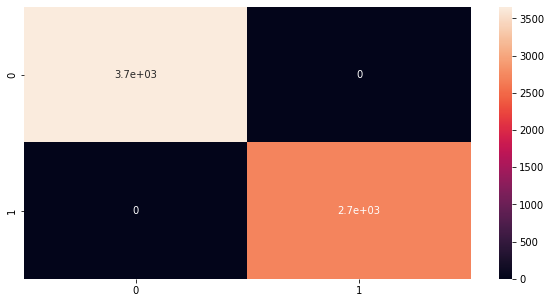

In [ ]:
# print(metrics.classification_report(y_test,resultado))
predict = DecisionTree.predict(X_test)
accuracy = accuracy_score(y_test, predict) 
accuracy
matriz = confusion_matrix(y_test,resultado)
print(matriz)
plt.figure(figsize=(10,5))
sns.heatmap(matriz, annot=True)

###Exportando nosso modelo


In [ ]:
pickle.dump(DecisionTree, open('/content/ineligenciaDecisionTree.pkl', 'wb'))

In [ ]:
dados =[{'availableAmount': 4213.0, 'amount': 12210.0, 'schedules': 11110.0, 'incomePerMonth': 11430.0, 'patrimony': 200.0, 'standardDeviation': 320.0, 'transactionDay': 230.0, 'transactionMonth': 430.0}]
dadoss = pd.DataFrame(dados)
dadoss

,availableAmount,amount,schedules,incomePerMonth,patrimony,standardDeviation,transactionDay,transactionMonth
0,4213.0,12210.0,11110.0,11430.0,200.0,320.0,230.0,430.0


In [ ]:
a = model.predict(dadoss) 
print(a)

[0]
